In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
df_nemo=pd.read_csv('./timelines_data/formed_timelines_2002/2002_spitz_nemo.csv', sep=';')
df_nemo['dates'] =  pd.to_datetime(df_nemo['dates'], format='%Y-%m-%d')
df_nemo['75.532663_17.902096_v']=df_nemo['75.532663_17.902096']-np.mean(df_nemo['75.532663_17.902096'])
df_nemo['76.006222_24.893752_v']=df_nemo['76.006222_24.893752']-np.mean(df_nemo['76.006222_24.893752'])
df_nemo['75.210923_11.252254_v']=df_nemo['75.210923_11.252254']-np.mean(df_nemo['75.210923_11.252254'])
df_nemo

,75.532663_17.902096,76.006222_24.893752,75.210923_11.252254,dates,75.532663_17.902096_v,76.006222_24.893752_v,75.210923_11.252254_v
0,-0.866979,-0.890416,-0.945982,2002-01-01,0.003173,0.002300,0.015237
1,-0.907407,-0.904165,-0.967084,2002-01-02,-0.037255,-0.011450,-0.005865
2,-0.899823,-0.924889,-0.946681,2002-01-03,-0.029671,-0.032174,0.014538
3,-0.888992,-0.878961,-0.923555,2002-01-04,-0.018840,0.013754,0.037664
4,-0.879334,-0.882886,-0.898750,2002-01-05,-0.009182,0.009830,0.062469
...,...,...,...,...,...,...,...
360,-0.814204,-0.794452,-0.897989,2002-12-27,0.055948,0.098264,0.063230
361,-0.820932,-0.797816,-0.911585,2002-12-28,0.049220,0.094900,0.049634
362,-0.833964,-0.797317,-0.923432,2002-12-29,0.036189,0.095398,0.037787
363,-0.841198,-0.806413,-0.933277,2002-12-30,0.028954,0.086303,0.027943


In [3]:
df_rean=pd.read_csv('./timelines_data/formed_timelines_2002/2002_spitz_reanalysis.csv', sep=';')
df_rean['dates'] =  pd.to_datetime(df_rean['dates'], format='%Y-%m-%d')
df_rean['75.532663_17.902096_v']=df_rean['75.532663_17.902096']-np.mean(df_rean['75.532663_17.902096'])
df_rean['76.006222_24.893752_v']=df_rean['76.006222_24.893752']-np.mean(df_rean['76.006222_24.893752'])
df_rean['75.210923_11.252254_v']=df_rean['75.210923_11.252254']-np.mean(df_rean['75.210923_11.252254'])
df_rean

,75.532663_17.902096,76.006222_24.893752,75.210923_11.252254,dates,75.532663_17.902096_v,76.006222_24.893752_v,75.210923_11.252254_v
0,-0.3240,-0.2591,-0.3683,2002-01-01,-0.009006,0.006095,-0.006708
1,-0.3240,-0.2552,-0.3706,2002-01-02,-0.009006,0.009995,-0.009008
2,-0.3170,-0.2552,-0.3736,2002-01-03,-0.002006,0.009995,-0.012008
3,-0.3071,-0.2532,-0.3745,2002-01-04,0.007894,0.011995,-0.012908
4,-0.2990,-0.2535,-0.3775,2002-01-05,0.015994,0.011695,-0.015908
...,...,...,...,...,...,...,...
360,-0.2323,-0.1972,-0.3055,2002-12-27,0.082694,0.067995,0.056092
361,-0.2309,-0.1965,-0.3066,2002-12-28,0.084094,0.068695,0.054992
362,-0.2289,-0.1947,-0.3091,2002-12-29,0.086094,0.070495,0.052492
363,-0.2309,-0.1925,-0.3068,2002-12-30,0.084094,0.072695,0.054792


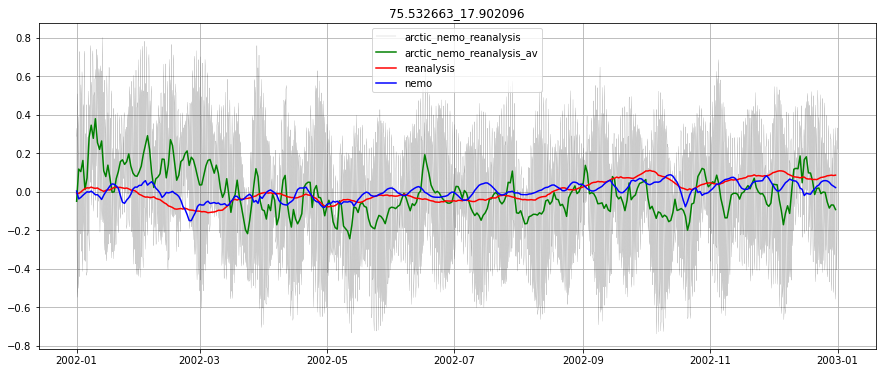

In [10]:
df=pd.read_csv('./timelines_data/nemo_arctic_reanalysis_2002_2003/75.532663_17.902096_2002-2003.csv', sep=',')
# геренируем часовые даты/время
per = pd.date_range(start ='1-1-2002', end ='1-1-2004', freq ='1H')
df['dates']=per
new_df=pd.DataFrame()
new_df['dates']=per
# переписываем колонку в формат дата/время из range
new_df['dates'] = pd.to_datetime(new_df['dates'])
new_df['sossheig-0-value']=df['sossheig-0-value']
new_df.set_index('dates', inplace=True)
# усредняем посуточно
new_df = new_df.groupby(pd.Grouper(freq='1D')).mean()
# приводим к среднему
new_df['sossheig-0-value']=new_df['sossheig-0-value']-np.mean(new_df['sossheig-0-value'])
#print(new_df)


plt.plot(df['dates'][:365*24], df['sossheig-0-value'][:365*24]-np.mean(df['sossheig-0-value']), label='arctic_nemo_reanalysis', c='black', linewidth=0.1)
plt.plot(new_df['sossheig-0-value'][:365], label='arctic_nemo_reanalysis_av', c='g')
plt.plot(df_rean['dates'], df_rean['75.532663_17.902096_v'], label='reanalysis', c='r')
plt.plot(df_nemo['dates'], df_nemo['75.532663_17.902096_v'], label='nemo', c='b')
plt.title('75.532663_17.902096')
plt.legend()
plt.grid()
plt.show()




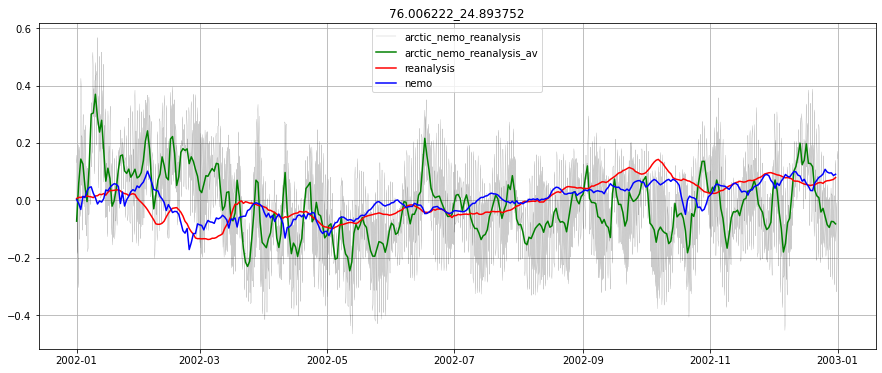

In [11]:
df=pd.read_csv('./timelines_data/nemo_arctic_reanalysis_2002_2003/76.006222_24.893752_2002-2003.csv', sep=',')
# геренируем часовые даты/время
per = pd.date_range(start ='1-1-2002', end ='1-1-2004', freq ='1H')
df['dates']=per
new_df=pd.DataFrame()
new_df['dates']=per
# переписываем колонку в формат дата/время из range
new_df['dates'] = pd.to_datetime(new_df['dates'])
new_df['sossheig-0-value']=df['sossheig-0-value']
new_df.set_index('dates', inplace=True)
# усредняем посуточно
new_df = new_df.groupby(pd.Grouper(freq='1D')).mean()
# приводим к среднему
new_df['sossheig-0-value']=new_df['sossheig-0-value']-np.mean(new_df['sossheig-0-value'])
#print(new_df)


plt.plot(df['dates'][:365*24], df['sossheig-0-value'][:365*24]-np.mean(df['sossheig-0-value']), label='arctic_nemo_reanalysis', c='black', linewidth=0.1)
plt.plot(new_df['sossheig-0-value'][:365], label='arctic_nemo_reanalysis_av', c='g')
plt.plot(df_rean['dates'], df_rean['76.006222_24.893752_v'], label='reanalysis', c='r')
plt.plot(df_nemo['dates'], df_nemo['76.006222_24.893752_v'], label='nemo', c='b')
plt.title('76.006222_24.893752')
plt.legend()
plt.grid()
plt.show()


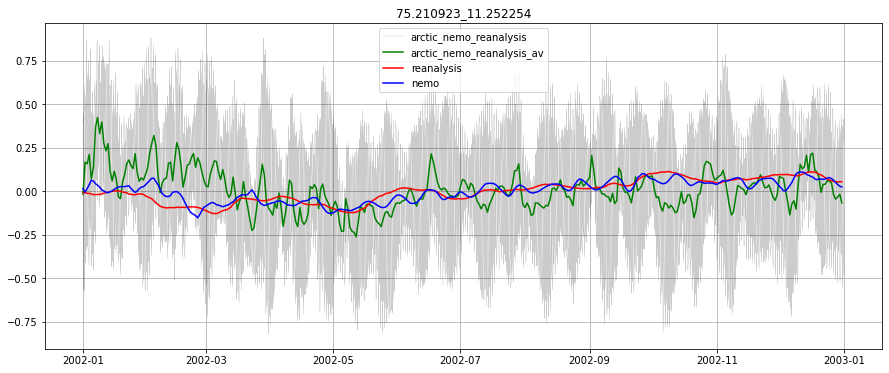

In [12]:
df=pd.read_csv('./timelines_data/nemo_arctic_reanalysis_2002_2003/75.210923_11.252254_2002-2003.csv', sep=',')
# геренируем часовые даты/время
per = pd.date_range(start ='1-1-2002', end ='1-1-2004', freq ='1H')
df['dates']=per
new_df=pd.DataFrame()
new_df['dates']=per
# переписываем колонку в формат дата/время из range
new_df['dates'] = pd.to_datetime(new_df['dates'])
new_df['sossheig-0-value']=df['sossheig-0-value']
new_df.set_index('dates', inplace=True)
# усредняем посуточно
new_df = new_df.groupby(pd.Grouper(freq='1D')).mean()
# приводим к среднему
new_df['sossheig-0-value']=new_df['sossheig-0-value']-np.mean(new_df['sossheig-0-value'])
#print(new_df)


plt.plot(df['dates'][:365*24], df['sossheig-0-value'][:365*24]-np.mean(df['sossheig-0-value']), label='arctic_nemo_reanalysis', c='black', linewidth=0.1)
plt.plot(new_df['sossheig-0-value'][:365], label='arctic_nemo_reanalysis_av', c='g')
plt.plot(df_rean['dates'], df_rean['75.210923_11.252254_v'], label='reanalysis', c='r')
plt.plot(df_nemo['dates'], df_nemo['75.210923_11.252254_v'], label='nemo', c='b')
plt.title('75.210923_11.252254')
plt.legend()
plt.grid()
plt.show()

*Можно еще гауссовым фильтром пройти, но мне кажется не сильно поможет*